        neighborhood  avg_delq_tax  total_delq_tax  Commercial  Gov't Owned  \
0   Allegheny Center  54756.980000       109513.96           1            1   
1     Allegheny West   4667.050000       116676.25          10            0   
2          Allentown   2234.148648       710459.27          14            0   
3          Arlington   2608.347983       620786.82           6            2   
4  Arlington Heights   6184.110000        18552.33           0            0   
5         Banksville   2882.753085       270978.79          14            0   
6  Bedford Dwellings   2199.406610       129764.99           4            1   
7          Beechview   2918.016117      1540712.51          27            0   
8        Beltzhoover   2477.964105      1509080.14          12            2   
9         Bloomfield   4210.201097      1305162.34          61            0   

   Industrial  Other  Residential  Utilities  total_cases  
0           0      0            0          0            2  
1         

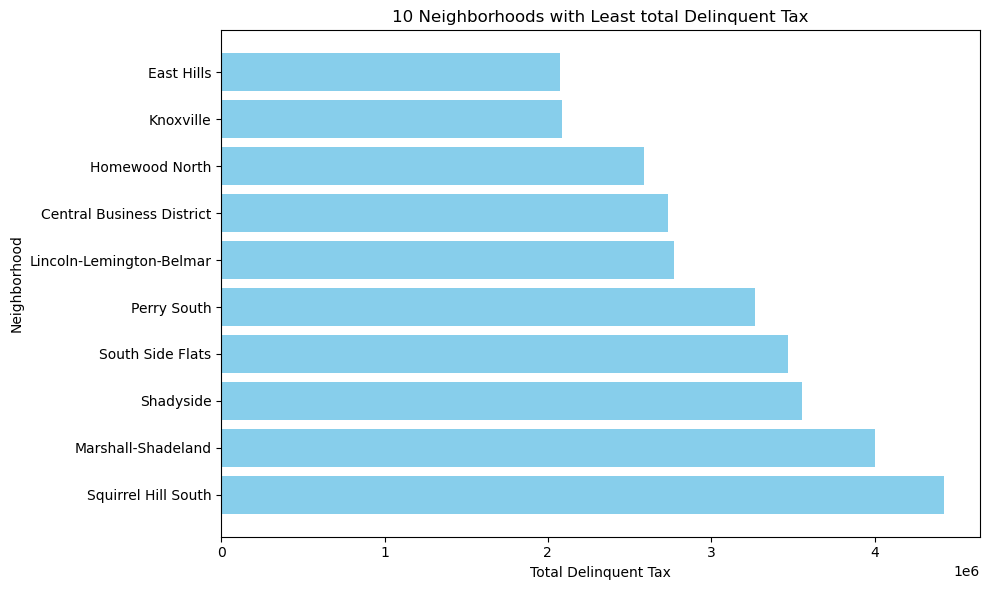

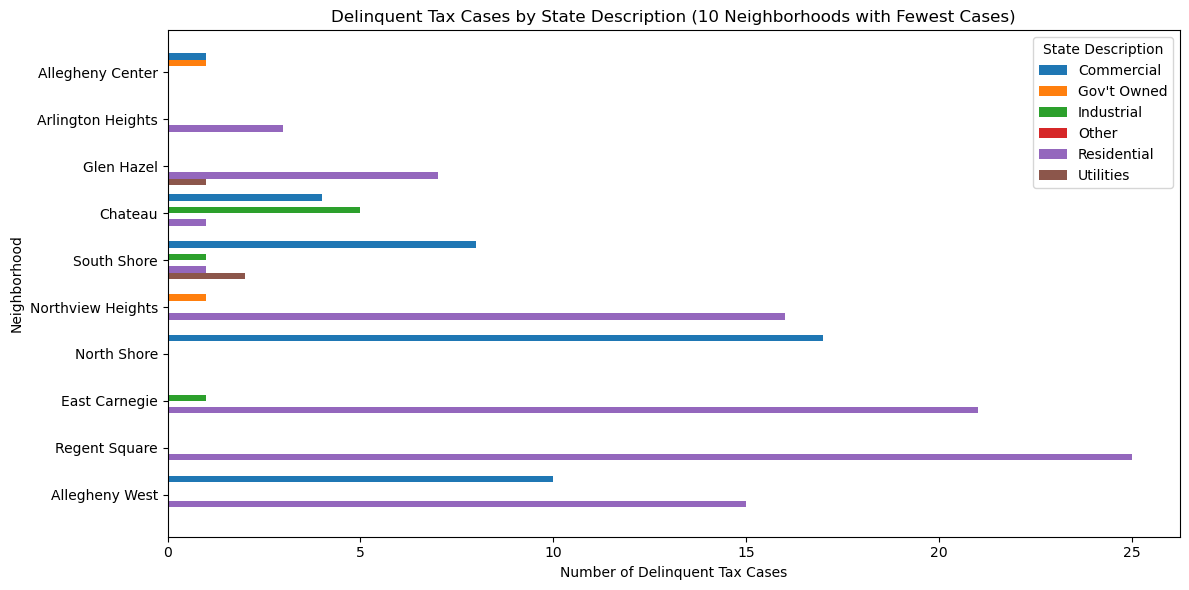

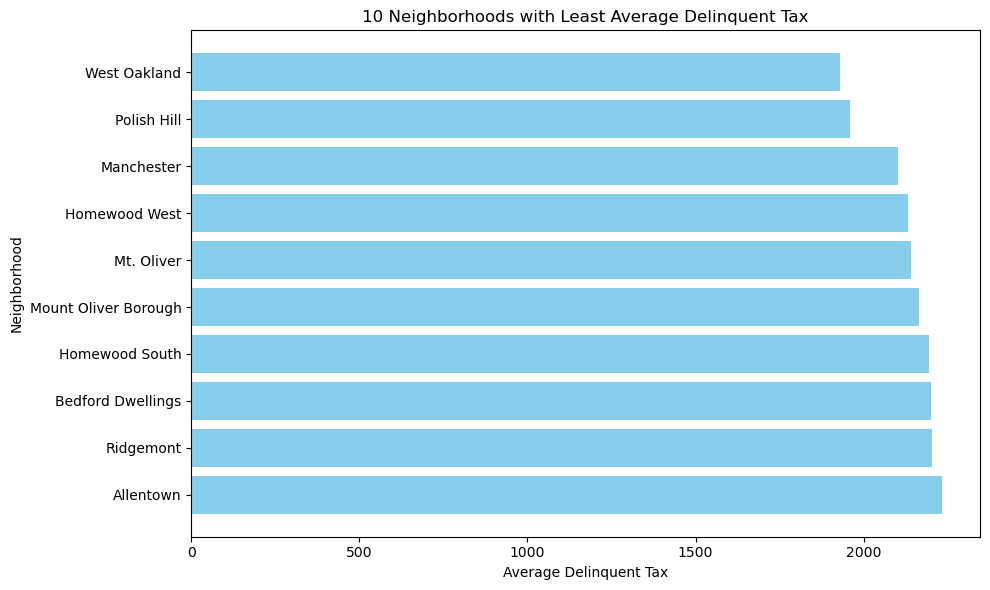

In [1]:
#import geopandas
import pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#Constructing new table
tax = pd.read_csv("taxDelinquency.tsv", sep="\t")

Ttotal = tax.groupby('neighborhood')['prior_delq_tax'].mean().reset_index() #has average delq tax per offender for each neighborhood
Ttotal.columns = ['neighborhood', 'avg_delq_tax']

Tcount = tax.groupby(['neighborhood', 'state_description']).size().unstack(fill_value=0).reset_index()
Tcount['total_cases'] = Tcount.drop(columns='neighborhood').sum(axis=1) #Has total cases of tax delq for each neighborhood 

taxdelq = tax.groupby(['neighborhood', 'state_description']).size().unstack(fill_value=0).reset_index() #combines into one table
taxdelq = pd.merge(Ttotal, Tcount, on='neighborhood')
taxdelq['total_delq_tax'] = taxdelq['avg_delq_tax'] * taxdelq['total_cases']
cols = ['neighborhood', 'avg_delq_tax', 'total_delq_tax'] + \
       [col for col in taxdelq.columns if col not in ['neighborhood', 'avg_delq_tax', 'total_delq_tax', 'total_cases']] + \
       ['total_cases']
taxdelq = taxdelq[cols]

print(taxdelq.head(10))

#Bar Graph Of total delq tax per neighborhood
bottomTotal = taxdelq.sort_values(by='total_delq_tax', ascending=True).tail(10)
# Plot
plt.figure(figsize=(10, 6))
plt.barh(bottomTotal['neighborhood'], bottomTotal['total_delq_tax'], color='skyblue')
plt.gca().invert_yaxis()  # So the smallest is at the top
plt.xlabel("Total Delinquent Tax")
plt.ylabel("Neighborhood")
plt.title("10 Neighborhoods with Least total Delinquent Tax")
plt.tight_layout()
plt.show()

#Bar Graph of delq tax cases by neighborhood and description of tax. 
bottom10_cases = taxdelq.sort_values(by='total_cases', ascending=True).head(10)

# Get the list of neighborhoods and state description columns
neighborhoods = bottom10_cases['neighborhood'].tolist()
state_columns = [col for col in bottom10_cases.columns if col not in ['neighborhood', 'avg_delq_tax', 'total_delq_tax', 'total_cases']]

# Set up base y positions and bar height
y = np.arange(len(neighborhoods))
bar_height = 0.8 / len(state_columns)

# Plot
plt.figure(figsize=(12, 6))

for i, state in enumerate(state_columns):
    values = bottom10_cases[state].values
    plt.barh(y + i * bar_height, values, height=bar_height, label=state)

# Center y-ticks between the grouped bars
plt.yticks(y + bar_height * (len(state_columns) - 1) / 2, neighborhoods)
plt.xlabel("Number of Delinquent Tax Cases")
plt.ylabel("Neighborhood")
plt.title("Delinquent Tax Cases by State Description (10 Neighborhoods with Fewest Cases)")
plt.legend(title="State Description")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

bottomAvg = taxdelq.sort_values(by='avg_delq_tax', ascending=True).head(10)
# Plot
plt.figure(figsize=(10, 6))
plt.barh(bottomAvg['neighborhood'], bottomAvg['avg_delq_tax'], color='skyblue')
plt.gca().invert_yaxis()  # So the smallest is at the top
plt.xlabel("Average Delinquent Tax")
plt.ylabel("Neighborhood")
plt.title("10 Neighborhoods with Least Average Delinquent Tax")
plt.tight_layout()
plt.show()




### PERSONAL CONCLUSION:
Based off of my analysis, the neighborhood with the least amount of people with deliquent taxes is Allegheny Central. Based off of this, we can assume that it is the most responsible when it comes to tax and properties. Similarly, the Arlington Heights owes the least amount of taxes combined and is second in least cases. This indicates a neighborhood that can be deemed responsible. On the other hand, Central Lawrenceville proves to owe the most amount of taxes, making it one of the least responsible neighborhoods in the city. 